In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak

import pandas as pd
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties

from numpy import inf

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS")

## Get data, transform ROOT tree into array

In [2]:
#events = ur.open('root://sci-xrootd.jlab.org//osgpool/eic/ATHENA/RECO/JETS/crossDivNrgCrab/DIS_NC_Q2gt10_crossDivNrgCrab_25mRad_18x275_v1.0007.root:events')
#gen_events = ur.open('root://sci-xrootd.jlab.org//osgpool/eic/ATHENA/FULL/JETS/crossDivNrgCrab/DIS_NC_Q2gt10_crossDivNrgCrab_25mRad_18x275_v1.0007.root:events')

events = ur.open('rec_highq2.root:events')
gen_events = ur.open('sim_highq2.root:events')

In [3]:
def get_vector(varname='HcalHadronEndcapClusters',energy='energy'):
    E = events["%s.%s"%(varname,energy)].array(library='np')
    x = events["%s.position.x"%varname].array(library='np')
    y = events["%s.position.y"%varname].array(library='np')
    z = events["%s.position.z"%varname].array(library='np')
    theta = events["%s.polar.theta"%varname].array(library='np')
    phi = events["%s.polar.phi"%varname].array(library='np')

    return E,x, y, z, theta, phi

In [4]:
def get_truth():
    pdgID = gen_events['mcparticles.pdgID'].array(library='np')
    status = gen_events['mcparticles.status'].array(library='np')
    genStatus = gen_events['mcparticles.genStatus'].array(library='np')
    pex = gen_events['mcparticles.psx'].array(library='np')
    pey = gen_events['mcparticles.psy'].array(library='np')
    pez = gen_events['mcparticles.psz'].array(library='np')

    return pdgID,status, genStatus,pex,pey,pez

In [5]:
E = {}
x = {}
y = {}
z  = {}
theta={}
phi = {}


## Get clusters

In [6]:
for i in ['HcalHadronEndcapClusters','HcalBarrelClusters','EcalEndcapPClusters','EcalEndcapNClusters','EcalBarrelClusters']:
    E[i], x[i], y[i],z[i], theta[i], phi[i]= get_vector("%s"%i,energy='energy')

## Get Truth info

In [7]:
mc = {} 
mc['pdgID'], mc['status'], mc['genStatus'], mc['pex'],mc['pey'], mc['pez']= get_truth()

## Loop over events, fill clusters into constituent arrays; run jet clustering 

In [8]:
jet_E = np.array([])
jet_eta = np.array([])

for ievt in range(10):
    #constituents = np.array([], dtype=DTYPE_PTEPM)#DTYPE_EP)

    for i in range(len(mc['pdgID'][ievt])):
        #if(mc['genStatus'][ievt][i]!=1): continue
        print('MC particle ID ', mc['pdgID'][ievt][i], ' status = ', 
              mc['status'][ievt][i], 'genStatus ', mc['genStatus'][ievt][i],
              ' px = %2.2f, py=%2.2f, pz=%2.2f'%(mc['pex'][ievt][i],mc['pey'][ievt][i],mc['pez'][ievt][i]))
    
    
    print('Ecal barrel clusters###########################')
    for i in range(len(E['EcalEndcapPClusters'][ievt])):
        part_energy = E['EcalEndcapPClusters'][ievt][i]/1000.0
        if(part_energy<0.100):
            continue
        part_phi = phi['EcalEndcapPClusters'][ievt][i]
        part_theta = theta['EcalEndcapPClusters'][ievt][i]
        part_eta = np.log(np.tan(part_theta/2.0))
        part_pt  = part_energy*np.sin(part_theta)
        print('Energy=%2.2f GeV, phi =%2.2f rad,  eta=%2.2f, pT = %2.2f GeV'%(part_energy,part_phi, part_eta,part_pt))
        #cluster = np.array([(part_pt, part_eta, part_phi, 0.0)], dtype=DTYPE_PTEPM)
        #constituents = np.append(constituents, cluster)
        
        
    print('Hcal barrel clusters ########')

    for i in range(len(E['HcalBarrelClusters'][ievt])):
        part_energy = E['HcalBarrelClusters'][ievt][i]/1000.0
        if(part_energy<0.25):
            continue
        part_phi = phi['HcalBarrelClusters'][ievt][i]
        part_theta = theta['HcalBarrelClusters'][ievt][i]
        part_eta = -np.log(np.tan(part_theta/2.0))
        part_pt  = part_energy*np.sin(part_theta)
        print('Energy=%2.2f GeV, phi =%2.2f rad, theta= %2.2f rad, eta=%2.2f, pT = %2.2f GeV'%(part_energy,part_phi,part_theta, part_eta,part_pt))
        #cluster = np.array([(part_pt, part_eta, part_phi, 0.0)], dtype=DTYPE_PTEPM)
        #onstituents = np.append(constituents, cluster)

      

MC particle ID  11  status =  16 genStatus  4  px = -0.00, py=0.00, pz=-18.00
MC particle ID  11  status =  512 genStatus  42  px = -0.00, py=0.00, pz=-18.00
MC particle ID  2212  status =  16 genStatus  4  px = 0.00, py=-0.00, pz=275.00
MC particle ID  21  status =  512 genStatus  61  px = 0.29, py=-0.08, pz=22.60
MC particle ID  2101  status =  512 genStatus  63  px = -0.50, py=-0.60, pz=4.23
MC particle ID  2  status =  512 genStatus  63  px = 0.22, py=0.68, pz=248.05
MC particle ID  11  status =  512 genStatus  21  px = -0.00, py=0.00, pz=-18.00
MC particle ID  21  status =  512 genStatus  41  px = -0.00, py=-0.00, pz=22.61
MC particle ID  2  status =  512 genStatus  43  px = 3.61, py=0.36, pz=20.17
MC particle ID  2  status =  512 genStatus  62  px = 3.63, py=0.36, pz=20.26
MC particle ID  111  status =  8196 genStatus  2  px = 2.71, py=0.60, pz=14.91
MC particle ID  221  status =  8196 genStatus  2  px = 0.32, py=-0.58, pz=5.50
MC particle ID  2212  status =  20482 genStatus  1  

MC particle ID  111  status =  8196 genStatus  2  px = 1.85, py=0.36, pz=12.12
MC particle ID  -213  status =  8196 genStatus  2  px = 0.32, py=0.02, pz=16.36
MC particle ID  211  status =  24578 genStatus  1  px = -0.35, py=0.06, pz=15.99
MC particle ID  221  status =  8196 genStatus  2  px = 1.02, py=-0.01, pz=16.79
MC particle ID  2114  status =  8196 genStatus  2  px = 0.30, py=0.17, pz=148.54
MC particle ID  11  status =  24578 genStatus  1  px = -10.04, py=-8.79, pz=-14.72
MC particle ID  211  status =  20482 genStatus  1  px = -0.09, py=0.49, pz=3.03
MC particle ID  -211  status =  28674 genStatus  1  px = 1.63, py=2.64, pz=12.60
MC particle ID  -321  status =  24578 genStatus  1  px = 1.02, py=0.24, pz=7.37
MC particle ID  111  status =  8196 genStatus  2  px = 1.34, py=0.45, pz=10.64
MC particle ID  22  status =  20482 genStatus  1  px = 0.82, py=0.22, pz=5.57
MC particle ID  22  status =  20482 genStatus  1  px = 1.04, py=0.14, pz=6.55
MC particle ID  -211  status =  20482 ge

In [12]:
def isolation(cone_theta,cone_phi, cluster_container, E_threshold=0.1):
    nclusters= len(cluster_container['E'])
    #if(cone_theta<0.05):
    #    return -999
    cone_eta = -np.log(np.tan(cone_theta/2.0))
    cone_iso = 0.0
    for i in range(nclusters):
        clus_E = cluster_container['E'][i]/1000.0
        if(clus_E<E_threshold):
            continue
        #print('Cluster E =%2.2f'%(clus_E))
        clus_E = cluster_container['E'][i]/1000.0
        clus_phi = cluster_container['phi'][i]
        clus_theta = cluster_container['theta'][i]
        clus_eta = -np.log(np.tan(clus_theta/2.0))
        clus_pt  = clus_E*np.sin(clus_theta)
        #print('Cluster E =%2.5f, cluster phi =%2.2f, cluster theta=%2.5f, cluster eta=%2.2f'%(clus_E,clus_phi,clus_theta,clus_eta))
        dphi = clus_phi - cone_phi
        dphi = (dphi + np.pi) % (2 * np.pi) - np.pi
        #print(' Delta- phi = %2.2f'%(dphi))
        dr = np.sqrt((dphi)**2 + (clus_eta-cone_eta)**2)
        #print('dr=%2.2f (cone eta %2.2f, cone azimuth=%2.2f), so dphi =%2.2f'%(dr,cone_eta,cone_phi,dphi))
        if(dr<1.0): 
            cone_iso += clus_E
    
    #print('Cone phi %2.2f, cone eta %2.2f, cone theta %2.2f, cone E= %2.2f GeV'%(cone_phi,cone_eta,cone_theta,cone_iso))
    return cone_iso

def find_truth_electron(mc_container):
    ptmax = 0.0
    index_e = -999
    for i in range(len(mc_container['pdgID'])):
        if (mc_container['pdgID'][i]!=11): continue
        px = mc_container['pex'][i]
        py = mc_container['pey'][i]
        pt = np.sqrt(px*px+py*py)
        if(pt>ptmax):
            ptmax = pt
            index_e=i
    #print('The scattered electron found has the following: %2.2f'%ptmax)
    return index_e
            
def find_electron(cluster_container,hcal_container, E_threshold=3.0):
    #Returns cluster with the highest pT in the event
    #print(cluster_container.keys())
    ptmax = 0.0
    electron_iso = 999
    index_max = -999
    nclusters= len(cluster_container['E'])

    for i in range(nclusters):
        clus_E = cluster_container['E'][i]/1000.0
        if(clus_E<E_threshold):
            continue
        if(cluster_container['theta'][i]*180.0/np.pi<2):
            continue
        clus_theta = cluster_container['theta'][i]
        clus_phi = cluster_container['phi'][i]

        clus_eta = -np.log(np.tan(clus_theta/2.0))
        clus_pt  = clus_E*np.sin(clus_theta)
        
        #print('Ecal isolation')
        clus_ecal_iso = isolation(clus_theta,clus_phi, cluster_container)
        #print('Hcal isolation')
        clus_hcal_iso = isolation(clus_theta,clus_phi, hcal_container)
        clus_iso = clus_ecal_iso + clus_hcal_iso - clus_E
        #remove non-isolated clusters
        if(clus_iso>clus_E*0.1): continue
        
        if(clus_pt>ptmax):
            ptmax = clus_pt
            index_max = i
            electron_iso= clus_iso 
    #if(index_max>0):
        
        #print('This is the electron candidate:')
        #print('ptmax %2.2f GeV'%ptmax, 'energy %2.2f GeV'%(cluster_container['E'][index_max]/1000.0))
        #print('polar angle %2.2f, azimthal angle =%2.2f, degrees '%(cluster_container['theta'][index_max]*180.0/np.pi,cluster_container['phi'][index_max]))
        #print('ISOLATION (R=1.0) isolation = %2.2f GeV'%(electron_iso))
        #print('clus ECAL iso =%2.2f, HCAL iso =%2.2f'%(clus_ecal_iso,clus_hcal_iso))
    #print(index_max)
        #print('ending finding electron routine')
    return index_max
    
def get_Empz(cluster_container,skip=None):
    nclusters= len(cluster_container['E'])
    Empz = 0.0
    #print('nclusters ', nclusters)
    for i in range(nclusters):
        if( skip is not None):
            if(skip==i):
                #print('Skipping electron %i'%(skip))
                continue
        #print(cluster_container['E'][i])
        Empz += cluster_container['E'][i]*(1-np.cos(cluster_container['theta'][i]))
    #print(Empz)
    return Empz/1000.0

def get_total_pxpy(cluster_container,E_threshold=0.1,skip=None):
    nclusters= len(cluster_container['E'])
    sum_px = 0.0
    sum_py = 0.0
    sum_pt = 0.0
    for i in range(nclusters):
        
        if( skip is not None):
            if(skip==i):
                #print('Skipping electron %i'%(skip))
                continue
        
        clus_E = cluster_container['E'][i]/1000.0
        if(clus_E<E_threshold):
            continue
        clus_phi =   cluster_container['phi'][i]
        clus_theta = cluster_container['theta'][i]
        clus_eta = -np.log(np.tan(clus_theta/2.0))
        clus_pt  = clus_E*np.sin(clus_theta)
        clus_px  = clus_pt*np.cos(clus_phi)
        clus_py  = clus_pt*np.sin(clus_phi)
        sum_px += clus_px
        sum_py += clus_py
    sum_pt = np.sqrt(sum_px*sum_px + sum_py*sum_py)
    #print('sum px', sum_px)
    #print('sum py', sum_py)
    #print('sum pt ', sum_pt)
    return sum_px, sum_py

In [13]:
def get_kinematics_electron(e_index, cluster_container,beam_energy = 18.0):
    #print('e index ', e_index)
    electron_E = cluster_container['E'][e_index]/1000.0
    electron_theta = cluster_container['theta'][e_index]
    electron_pt  = electron_E*np.sin(electron_theta)

    #print('Electron E %2.2f, angle =%2.2f'%(electron_E,electron_theta))
    y  = 1 - (electron_E/(2.0*beam_energy))*(1-np.cos(electron_theta))
    Q2 = electron_pt**2/(1-y)
    #print('Q2=%2.2f , y =%2.2f'%(Q2, y))
    return Q2, y

def get_kinematics_electron_truth(px,py,pz,beam_energy=18.0):
    electron_E = np.sqrt(px*px+py*py+pz*pz)
    electron_pt = np.sqrt(px*px+py*py)
    electron_theta = np.arccos(pz/electron_E)

    y  = 1 - (electron_E/(2.0*beam_energy))*(1-np.cos(electron_theta))
    Q2 = electron_pt**2/(1-y)
    return Q2, y, electron_E, electron_theta

In [17]:

evt_Q2 = np.array([])
evt_y = np.array([])
evt_x = np.array([])

evt_Total = np.array([])
evt_Empz = np.array([])
evt_xh  = np.array([])
evt_yh  = np.array([])
evt_Q2h = np.array([])
evt_xsigma  = np.array([])
evt_ysigma  = np.array([])
evt_Q2sigma = np.array([])
gen_evt_Q2 = np.array([])
gen_evt_y = np.array([])
gen_evt_x = np.array([])

evt_e_eta = np.array([])
evt_e_E = np.array([])
evt_e_phi = np.array([])


jet_dphi = np.array([])
jet_ptratio = np.array([])
jet_eta = np.array([])
jet_E = np.array([])
jet_phi = np.array([])

#for ievt in range(len(E['HcalBarrelClusters'])):
for ievt in range(1000):
    #print('ievent' , ievt)
    #constituents = np.array([], dtype=DTYPE_PTEPM)#DTYPE_EP)
    hcal_clusters = {}
    ecal_clusters = {}
    hcal_clusters['E'] = np.concatenate((E['HcalBarrelClusters'][ievt], E['HcalHadronEndcapClusters'][ievt]), axis=0)
    hcal_clusters['phi']= np.concatenate((phi['HcalBarrelClusters'][ievt], phi['HcalHadronEndcapClusters'][ievt]), axis=0)
    hcal_clusters['theta'] = np.concatenate((theta['HcalBarrelClusters'][ievt], theta['HcalHadronEndcapClusters'][ievt]), axis=0)
    ecal_clusters['E'] = np.concatenate((E['EcalEndcapNClusters'][ievt],E['EcalBarrelClusters'][ievt], E['EcalEndcapPClusters'][ievt]), axis=0)
    ecal_clusters['phi'] = np.concatenate((phi['EcalEndcapNClusters'][ievt],phi['EcalBarrelClusters'][ievt], phi['EcalEndcapPClusters'][ievt]), axis=0)
    ecal_clusters['theta'] = np.concatenate((theta['EcalEndcapNClusters'][ievt],theta['EcalBarrelClusters'][ievt], theta['EcalEndcapPClusters'][ievt]), axis=0)
    
    
    e_index = find_electron(ecal_clusters,hcal_clusters)
    #print(e_index)
    if(e_index<0): 
        #print('Electron candidate with minimum 5 GeV energy was not found')
        continue
        
    electron_E = ecal_clusters['E'][e_index]/1000.0
    electron_theta = ecal_clusters['theta'][e_index]
    electron_phi  = ecal_clusters['phi'][e_index]
    #print('electron theta', electron_theta)
    evt_mc = {}
    evt_mc['pdgID'] = mc['pdgID'][ievt]
    evt_mc['genStatus'] = mc['genStatus'][ievt]
    evt_mc['pex'] = mc['pex'][ievt]
    evt_mc['pey'] = mc['pey'][ievt]
    evt_mc['pez'] = mc['pez'][ievt]
    evt_mc = pd.DataFrame.from_dict(evt_mc)
    evt_mc.eval('E= sqrt(pex*pex + pey*pey + pez*pez) ',inplace=True)
    #evt_mc.eval('theta= atan2(pey/pez) ',inplace=True)
    evt_mc.eval('pt = sqrt(pex*pex + pey*pey)',inplace=True)
    evt_mc.head()
    #Find true electron
    e_truth_index = find_truth_electron(evt_mc)
    #print('Electron truth index ', e_truth_index)
    genQ2, geny, gen_leptonE, gen_leptonTheta = get_kinematics_electron_truth(evt_mc['pex'][e_truth_index],evt_mc['pey'][e_truth_index],evt_mc['pez'][e_truth_index])
    genx = genQ2/(4*10.0*275*geny)
    gen_evt_Q2 = np.append(gen_evt_Q2,genQ2)
    gen_evt_y = np.append(gen_evt_y,geny)
    gen_evt_x  = np.append(gen_evt_x, genx)
    #print('TRUE VALUES OF Q2 = %2.2f , y = %2.2f'%(genQ2,geny))
    #print('TRUE VALUES OF E = %2.2f , theta = %2.2f'%(gen_leptonE,gen_leptonTheta))

    ##ecal_iso = isolation(electron_theta, electron_phi, ecal_clusters)
    #print('Hcal isolation')
    ##hcal_iso = isolation(electron_theta, electron_phi, hcal_clusters)
    ##iso = ecal_iso + hcal_iso - electron_E
    
    #print('Electron candidate is %2.2f =, angle=%2.2f, iso =%2.2f'%(electron_E,electron_theta*180.0/np.pi,iso))
    
    Q2, y= get_kinematics_electron(e_index,ecal_clusters)
    x = Q2/(4*10.0*275*y)
    evt_Q2 = np.append(evt_Q2, Q2)
    evt_y = np.append(evt_y, y)
    evt_x = np.append(evt_x, x) 
    Empz = get_Empz(hcal_clusters) + get_Empz(ecal_clusters,skip=e_index)
    evt_Empz = np.append(evt_Empz, get_Empz(hcal_clusters) + get_Empz(ecal_clusters))

  
    ecal_px, ecal_py = get_total_pxpy(ecal_clusters,skip=e_index)
    hcal_px , hcal_py = get_total_pxpy(hcal_clusters)
    total_px = ecal_px + hcal_px
    total_py = hcal_py + hcal_py
    #print('TOTAL ', total_px, total_py)
    TOT = np.sqrt(total_px*total_px + total_py*total_py)
    #print('TOT = %2.2f'%TOT)
    evt_Total = np.append(evt_Total, TOT)

    ##Hadronic reconstruction (Jacquet Blondel)
    y_h = Empz/(2.0*10.0)
    Q2_h = TOT*TOT/(1.0-y_h)
    x_h  = Q2_h/(4*10.0*275*y_h)
    evt_yh = np.append(evt_yh, y_h)
    evt_Q2h = np.append(evt_Q2h, Q2_h)
    evt_xh = np.append(evt_xh, x_h)

    #print('electron theta %2.2f' %(electron_theta), ' electron energy =%2.2f'%(electron_E))
    ## Sigma method
    #print('Empz = %2.2f '%(Empz))
    #print('electron_E*(1-np.cos(electron_theta)) =%2.2f'%(electron_E*(1-np.cos(electron_theta))))
    y_sigma = Empz/(Empz + electron_E*(1-np.cos(electron_theta)))
    Q2_sigma= (electron_E**2)*(np.sin(electron_theta)**2)/(1-y_sigma)
    x_sigma = Q2_sigma/(4*10.0*275*y_sigma)
    evt_ysigma = np.append(evt_ysigma, y_sigma)
    evt_Q2sigma = np.append(evt_Q2sigma, Q2_sigma)
    evt_xsigma = np.append(evt_xsigma, x_sigma)
    #print('y =%2.2f, y_h = %2.2f, Q2=%2.2f , Q2_h=%2.2f'%(y,y_h,Q2,Q2_h))
    #print('y_sigma = %2.2f, Q2_sigma=%2.2f'%(y_sigma,Q2_sigma))
 
    evt_e_eta = np.append(evt_e_eta, -np.log(np.tan(ecal_clusters['theta'][e_index]/2.0)))
    evt_e_E = np.append(evt_e_E,0.001*ecal_clusters['E'][e_index])
    evt_e_phi = np.append(evt_e_phi, ecal_clusters['phi'][e_index])
    
    #Loop over 

In [15]:
df = {}
df['Q2'] = evt_Q2
df['y'] = evt_y
df['x'] = evt_x

df['ETotal'] = evt_Total
df['Empz'] = evt_Empz 
df['xh'] = evt_xh
df['yh'] = evt_yh
df['Q2h'] = evt_Q2h
df['xsigma'] = evt_xsigma
df['ysigma'] = evt_ysigma
df['Q2sigma'] = evt_Q2sigma
df['e_E'] = evt_e_E
df['e_eta'] = evt_e_eta
df['e_phi'] = evt_e_phi
df['gen_Q2'] = gen_evt_Q2
df['gen_y'] = gen_evt_y
df['gen_x'] = gen_evt_x


df = pd.DataFrame.from_dict(df)
df.eval('yh_ratio = yh/gen_y',inplace=True)
df.eval('ysigma_ratio = ysigma/gen_y',inplace=True)
df.eval('y_ratio = y/gen_y',inplace=True)

df.eval('xh_ratio = xh/gen_x',inplace=True)
df.eval('xsigma_ratio = xsigma/gen_x',inplace=True)
df.eval('x_ratio = x/gen_x',inplace=True)

df.eval('Q2h_ratio = Q2h/gen_Q2',inplace=True)
df.eval('Q2sigma_ratio = Q2sigma/gen_Q2',inplace=True)
df.eval('Q2_ratio = Q2/gen_Q2',inplace=True)


In [18]:
df['gen_Q2'].min()

93.40344770294199

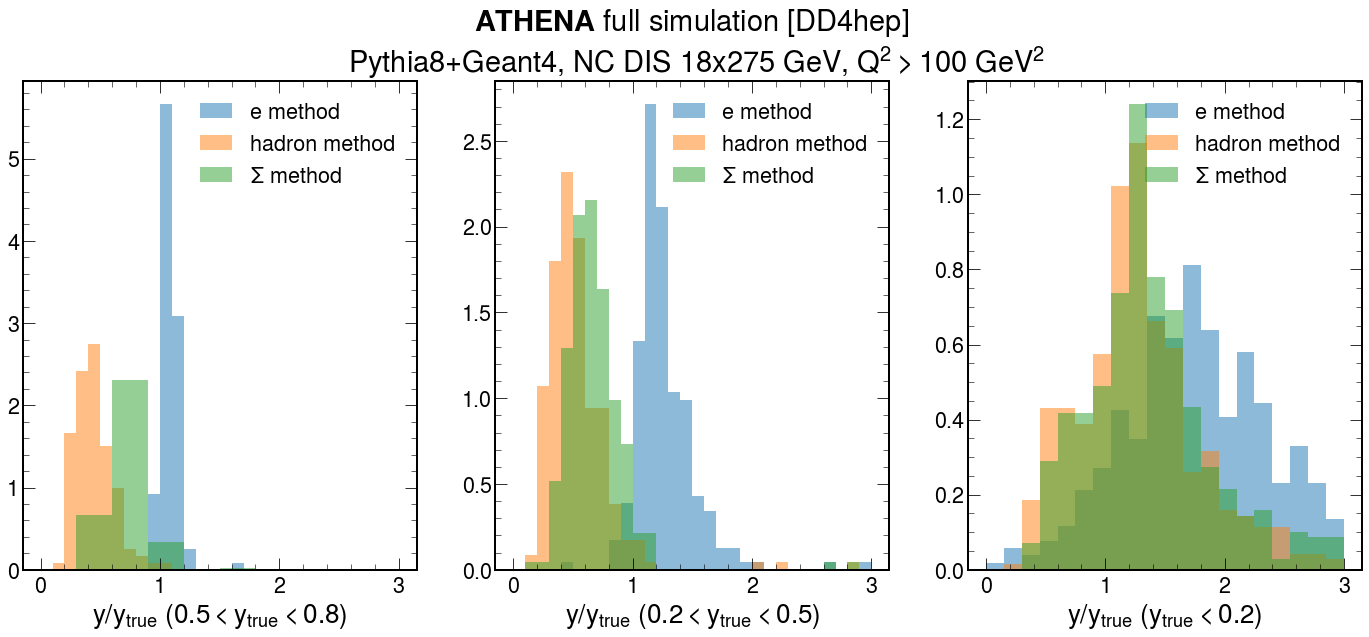

In [19]:
fig,ax = plt.subplots(1,3,figsize=(24,9))
ax = ax.flatten()
ax[0].hist(df.query('gen_y>0.5 and gen_y<0.8')['y_ratio'],density=True,bins=30,range=(0,3),alpha=0.5,label='e method')
ax[0].hist(df.query('gen_y>0.5 and gen_y<0.8')['yh_ratio'],density=True,bins=30,range=(0,3),alpha=0.5,label='hadron method')
ax[0].hist(df.query('gen_y>0.5 and gen_y<0.8')['ysigma_ratio'],density=True,bins=10,range=(0,3),alpha=0.5,label='$\Sigma$ method')
ax[0].legend()

ax[1].hist(df.query('gen_y<0.5 and gen_y>0.2')['y_ratio'],density=True,bins=30,range=(0,3),alpha=0.5,label='e method')
ax[1].hist(df.query('gen_y<0.5 and gen_y>0.2')['yh_ratio'],density=True,bins=30,range=(0,3),alpha=0.5,label='hadron method')
ax[1].hist(df.query('gen_y<0.5 and gen_y>0.2')['ysigma_ratio'],density=True,bins=30,range=(0,3),alpha=0.5,label='$\Sigma$ method')
ax[1].legend()


ax[2].hist(df.query('gen_y<0.2 ')['y_ratio'],density=True,bins=20,range=(0,3),alpha=0.5,label='e method')
ax[2].hist(df.query('gen_y<0.2 ')['yh_ratio'],density=True,bins=20,range=(0,3),alpha=0.5,label='hadron method')
ax[2].hist(df.query('gen_y<0.2 ')['ysigma_ratio'],density=True,bins=20,range=(0,3),alpha=0.5,label='$\Sigma$ method')
ax[2].legend()
ax[1].set_title(r"$\bf{ATHENA}$"+' full simulation [DD4hep] \n Pythia8+Geant4, NC DIS 18x275 GeV, $Q^{2}>100$ GeV$^{2}$',fontsize=29)



ax[0].set_xlabel(r'y/$y_{true}$ ($0.5<y_{true}<0.8$)')

ax[1].set_xlabel(r'y/$y_{true}$ ($0.2<y_{true}<0.5$)')
ax[2].set_xlabel(r'y/$y_{true}$ ($y_{true}<0.2$)')

plt.show()


## Plotting 

['gen_y>0.5 and gen_y<0.8' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.8
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


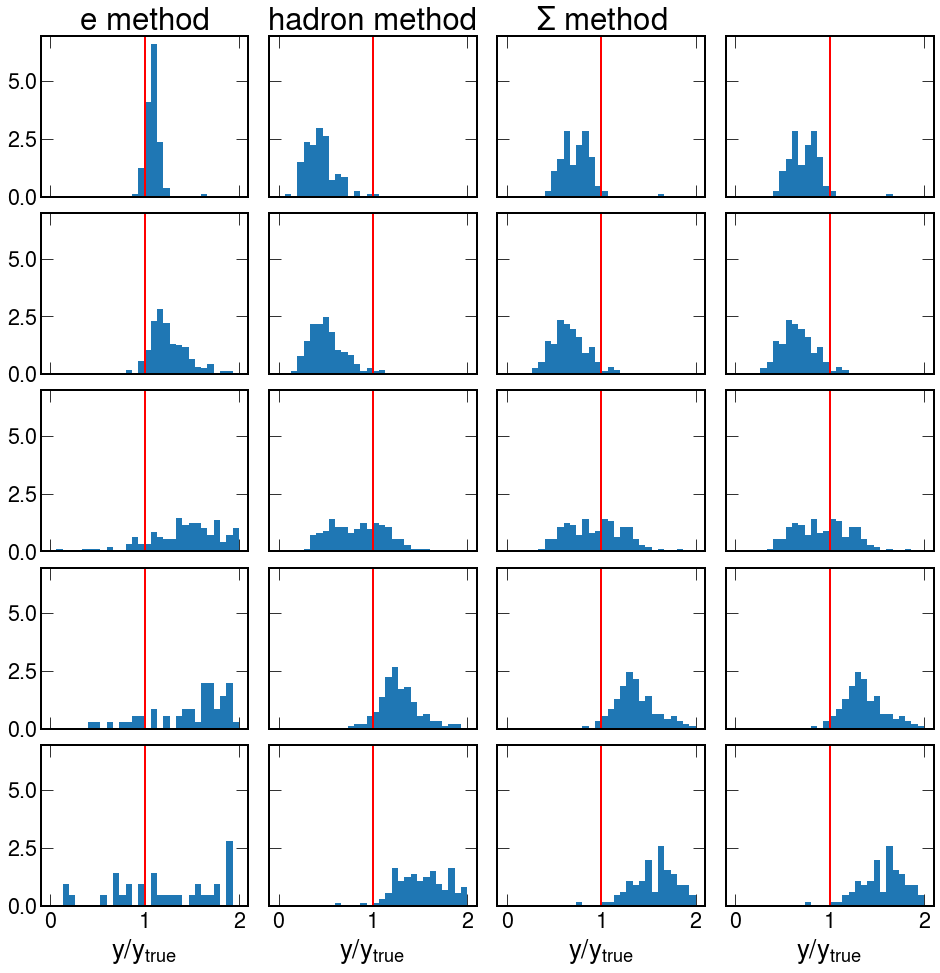

In [21]:
fig,ax = plt.subplots(5,4,figsize=(16,16),sharey=True,sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.8', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)



for i in range(5):
    print(ybins[i])
    ax[0 + 4*i].hist(df.query(ybins[i])['y_ratio'],density=True,bins=30,range=(0,2),label='e method')
    ax[1 + 4*i].hist(df.query(ybins[i])['yh_ratio'],density=True,bins=30,range=(0,2),label='hadron method')
    ax[2 + 4*i].hist(df.query(ybins[i])['ysigma_ratio'],density=True,bins=30,range=(0,2),label='$\Sigma$ method')
    ax[3 + 4*i].hist(df.query(ybins[i])['ysigma_ratio'],density=True,bins=30,range=(0,2),label='$\Sigma$ method')

for i in range(len(ax.flatten())):
    ax[i].axvline(1.0,color='red',lw=2)
#ax[1].set_title(r"$\bf{ATHENA}$"+' full simulation [DD4hep] \n Pythia8+Geant4, NC DIS 18x275 GeV, $Q^{2}>100$ GeV$^{2}$',fontsize=29)
    ax[i].set_xticks([],minor=True)
    ax[i].set_yticks([], minor=True)

    # for minor ticks
    #ax[i].set_xticks([], minor=True)

plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].set_title('e method')
ax[1].set_title('hadron method')
ax[2].set_title('$\Sigma$ method')

ax[-1].set_xlabel(r'y/$y_{true}$ ')

ax[-2].set_xlabel(r'y/$y_{true}$ ')
ax[-3].set_xlabel(r'y/$y_{true}$ ')
ax[-4].set_xlabel(r'y/$y_{true}$ ')

plt.show()


## Plot jet energy spectrum

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(24,9))
ax = ax.flatten()
ax[0].hist(gen_evt_Q2,density=True,bins=np.geomspace(10,15000,20),histtype='step',color='black',lw=3,alpha=1,label='True')
ax[0].hist(evt_Q2,density=True,bins=np.geomspace(10,15000,20),alpha=0.5,label='e method')
ax[0].hist(evt_Q2h,density=True,bins=np.geomspace(10,15000,20),alpha=0.5,label='Hadron method' )
ax[0].hist(evt_Q2sigma,density=True,bins=np.geomspace(10,15000,20),alpha=0.5,label='$\Sigma$ method' )


ax[0].legend(loc='best')
ax[1].hist(gen_evt_y,bins=10,range=(0,1.0),alpha=1, lw=3,histtype='step',color='black',label='True')
ax[1].hist(evt_y,bins=10,range=(0,1.0),alpha=0.5,label='e method')
ax[1].hist(evt_ysigma,bins=10,range=(0,1.0),alpha=0.5,label='Hadron method')
ax[1].hist(evt_yh,bins=10,range=(0,1.0),alpha=0.5, label='$\Sigma$ method')

#ax[3].hist(evt_MET,bins=10)
ax[2].hist(evt_Empz,bins=20,range=(0,72))

#plt.text(0.80, 0.77,'18 x 275 GeV \n $Q^{2}>100~GeV^{2}$ \n anti $k_{T}$, $R=1.0$ \n $\eta^{jet}>1.0$ \n calorimetric reco',
#                 horizontalalignment='center',multialignment='left',
#                 verticalalignment='center',transform = ax.transAxes, fontsize=20)
ax[1].set_title(r"$\bf{ATHENA}$"+' full simulation [DD4hep] \n Pythia8+Geant4, NC DIS 18x275 GeV, $Q^{2}>100$ GeV$^{2}$',fontsize=29)
#ax[0].set_ylabel('Normalized entries')
ax[0].set_xlabel(r'$Q^{2}$ [GeV$^{2}$]')
ax[1].set_xlabel(r'$y$')
#ax[3].set_xlabel(r'Missing Transverse Energy [GeV]')
ax[2].set_xlabel(r'$\sum E - p_{z}$ [GeV]')
ax[2].axvline(2*18.0,color='red',lw=3,label='2 $E_{e}$')
ax[1].legend()
ax[0].set_yscale('log')
ax[0].set_xscale('log')
#ax[1].set_yscale('log')

plt.show()

<ipython-input-16-d805b88179ea>:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[1].set_yscale('log')


Text(0.5, 0, '$\\Delta\\phi_{electron-jet}$ [rad]')

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


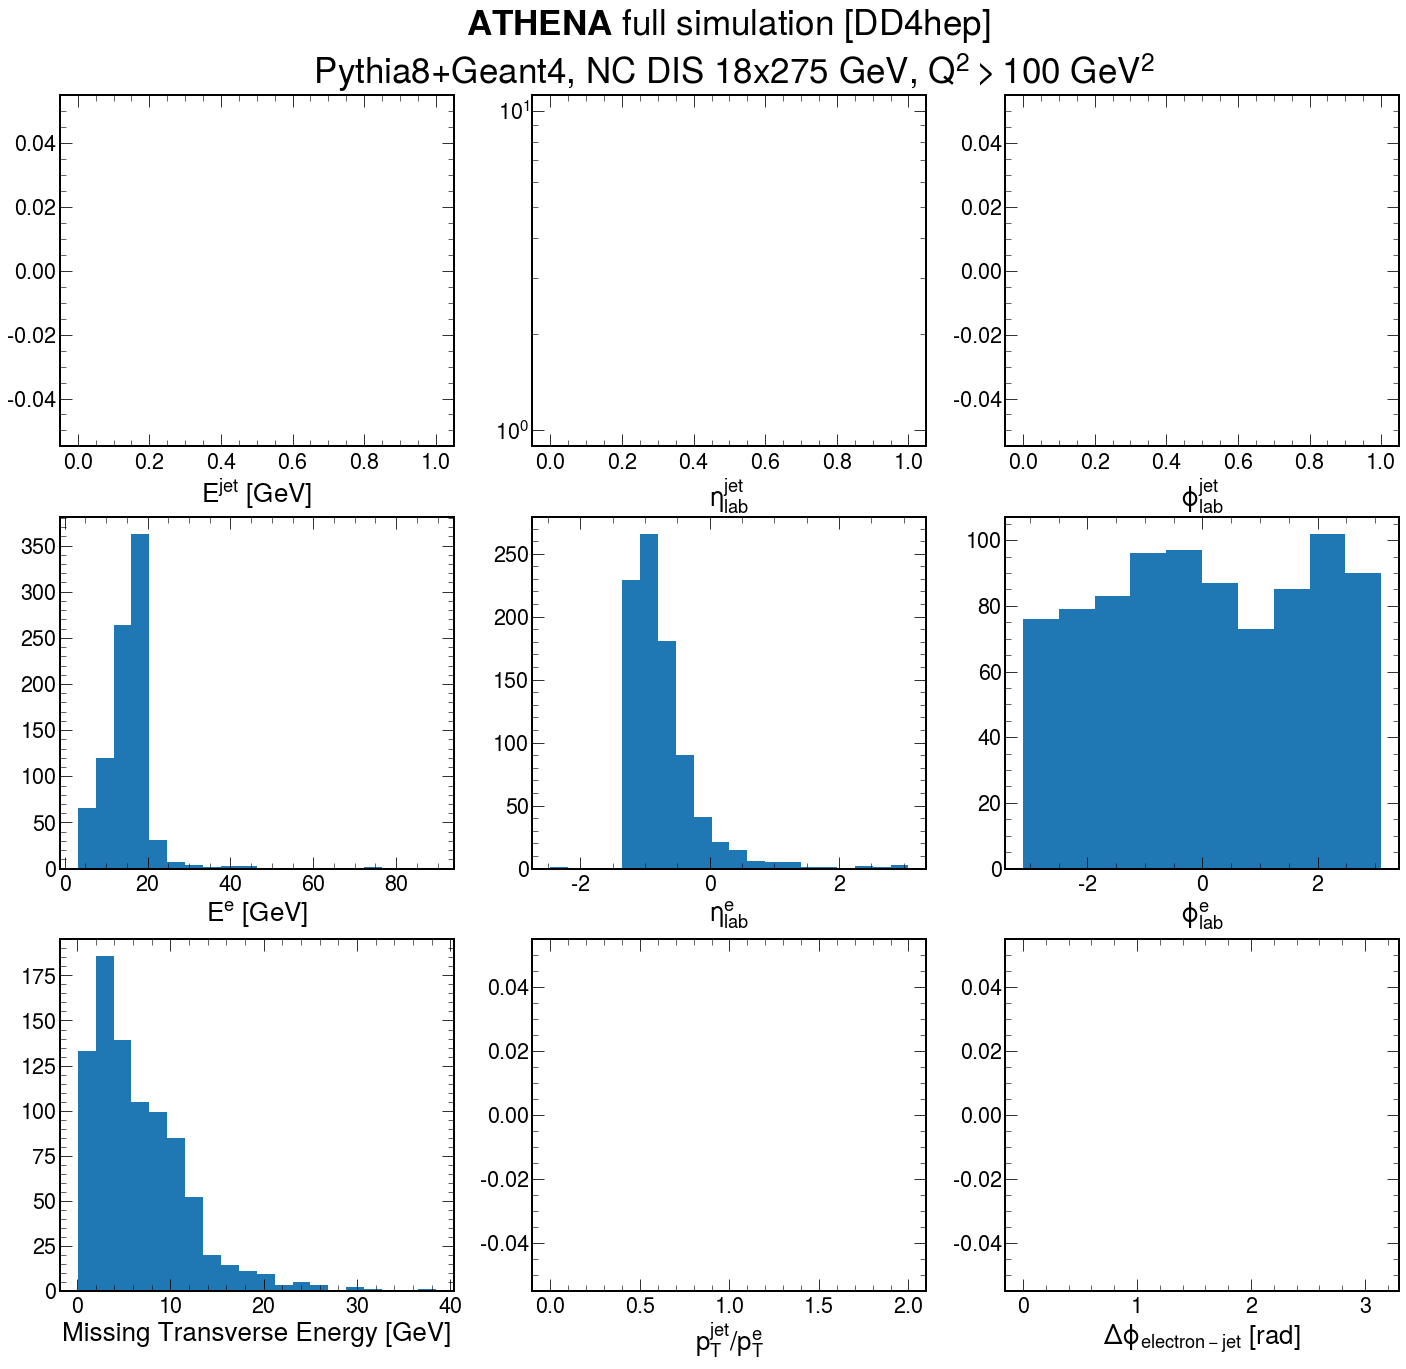

In [16]:
fig,ax = plt.subplots(3,3,figsize=(24,22))
ax = ax.flatten()

ax[0].hist(jet_E,bins=20)
ax[1].hist(jet_eta,bins=20)
ax[2].hist(jet_phi,bins=10)

ax[3].hist(evt_e_E,bins=20)
ax[4].hist(evt_e_eta,bins=20)
ax[5].hist(evt_e_phi,bins=10)

ax[6].hist(evt_Total,bins=20)
ax[7].hist(jet_ptratio,bins=20,range=(0,2))
ax[8].hist(jet_dphi,bins=20,range=(0,np.pi))

ax[1].set_yscale('log')
ax[1].set_title(r"$\bf{ATHENA}$"+' full simulation [DD4hep] \n Pythia8+Geant4, NC DIS 18x275 GeV, $Q^{2}>100$ GeV$^{2}$',fontsize=35)


ax[0].set_xlabel('$E^{jet}$ [GeV]')
ax[1].set_xlabel('$\eta^{jet}_{lab}$')
ax[2].set_xlabel('$\phi^{jet}_{lab}$')

ax[3].set_xlabel('$E^{e} $ [GeV]')
ax[4].set_xlabel('$\eta^{e}_{lab}$')
ax[5].set_xlabel('$\phi^{e}_{lab}$')

ax[6].set_xlabel('Missing Transverse Energy [GeV]')
ax[7].set_xlabel('$p_{T}^{jet}/p_{T}^{e}$')
ax[8].set_xlabel('$\Delta\phi_{electron-jet}$ [rad]')




In [ ]:
#gen_events=  ur.open('root://sci-xrootd.jlab.org//osgpool/eic/ATHENA/FULL/JETS/crossDivNrgCrab/DIS_NC_Q2gt10_crossDivNrgCrab_25mRad_18x275_v1.0097.root:events')
#gen_ak_arrays = gen_events.arrays(filter_name='*mcparticle*')
#%time
#events.keys(filter_name='*Clusters*')
#ak_arrays = events.arrays(filter_name='*Clusters*')
#for batch in events.iterate(step_size="1 MB",filter_name='*Clusters*'):
#    print(type(batch))